In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
from glob import glob

file_name = glob('edu/academy_edu/*.csv')
file_name

['edu/academy_edu\\xAPI-Edu-Data.csv']

In [211]:
df = pd.read_csv(file_name)

In [212]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [213]:
df.shape

(480, 17)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

# Feature engineering

## Class ordinary encoding

In [215]:
df["Class"].unique()

array(['M', 'L', 'H'], dtype=object)

In [216]:
classid = {'M':1, 'L':0, 'H':2}
df["class_fill"] = df["Class"].copy()
df["class_fill"] = df["Class"].map(classid)
df[["Class", "class_fill"]].sample(10)

,Class,class_fill
289,M,1
95,H,2
407,L,0
58,M,1
347,H,2
346,H,2
419,H,2
478,L,0
269,M,1
178,H,2


## 필요없는 컬럼 삭제

In [217]:
df = df.drop(columns=['Class','NationalITy', 'PlaceofBirth', 'GradeID'])
df.head(2)

,gender,StageID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,class_fill
0,M,lowerlevel,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,1
1,M,lowerlevel,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,1


In [218]:
df.columns

Index(['gender', 'StageID', 'SectionID', 'Topic', 'Semester', 'Relation',
       'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'class_fill'],
      dtype='object')

## 원핫인코딩

In [219]:
#컬럼명 변경
df = df.rename(columns={'class_fill':'Class'})
df.columns

Index(['gender', 'StageID', 'SectionID', 'Topic', 'Semester', 'Relation',
       'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [220]:
df.head()

,gender,StageID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,lowerlevel,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,1
1,M,lowerlevel,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,1
2,M,lowerlevel,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,0
3,M,lowerlevel,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,0
4,M,lowerlevel,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,1


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   StageID                   480 non-null    object
 2   SectionID                 480 non-null    object
 3   Topic                     480 non-null    object
 4   Semester                  480 non-null    object
 5   Relation                  480 non-null    object
 6   raisedhands               480 non-null    int64 
 7   VisITedResources          480 non-null    int64 
 8   AnnouncementsView         480 non-null    int64 
 9   Discussion                480 non-null    int64 
 10  ParentAnsweringSurvey     480 non-null    object
 11  ParentschoolSatisfaction  480 non-null    object
 12  StudentAbsenceDays        480 non-null    object
 13  Class                     480 non-null    int64 
dtypes: int64(5), object(9)
mem

In [222]:
#drop_first = True
mod_df = pd.get_dummies(df,drop_first = True)
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   raisedhands                    480 non-null    int64
 1   VisITedResources               480 non-null    int64
 2   AnnouncementsView              480 non-null    int64
 3   Discussion                     480 non-null    int64
 4   Class                          480 non-null    int64
 5   gender_M                       480 non-null    uint8
 6   StageID_MiddleSchool           480 non-null    uint8
 7   StageID_lowerlevel             480 non-null    uint8
 8   SectionID_B                    480 non-null    uint8
 9   SectionID_C                    480 non-null    uint8
 10  Topic_Biology                  480 non-null    uint8
 11  Topic_Chemistry                480 non-null    uint8
 12  Topic_English                  480 non-null    uint8
 13  Topic_French        

In [223]:
mod_df

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,StageID_MiddleSchool,StageID_lowerlevel,SectionID_B,SectionID_C,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
476,50,77,14,28,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
478,30,17,14,57,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

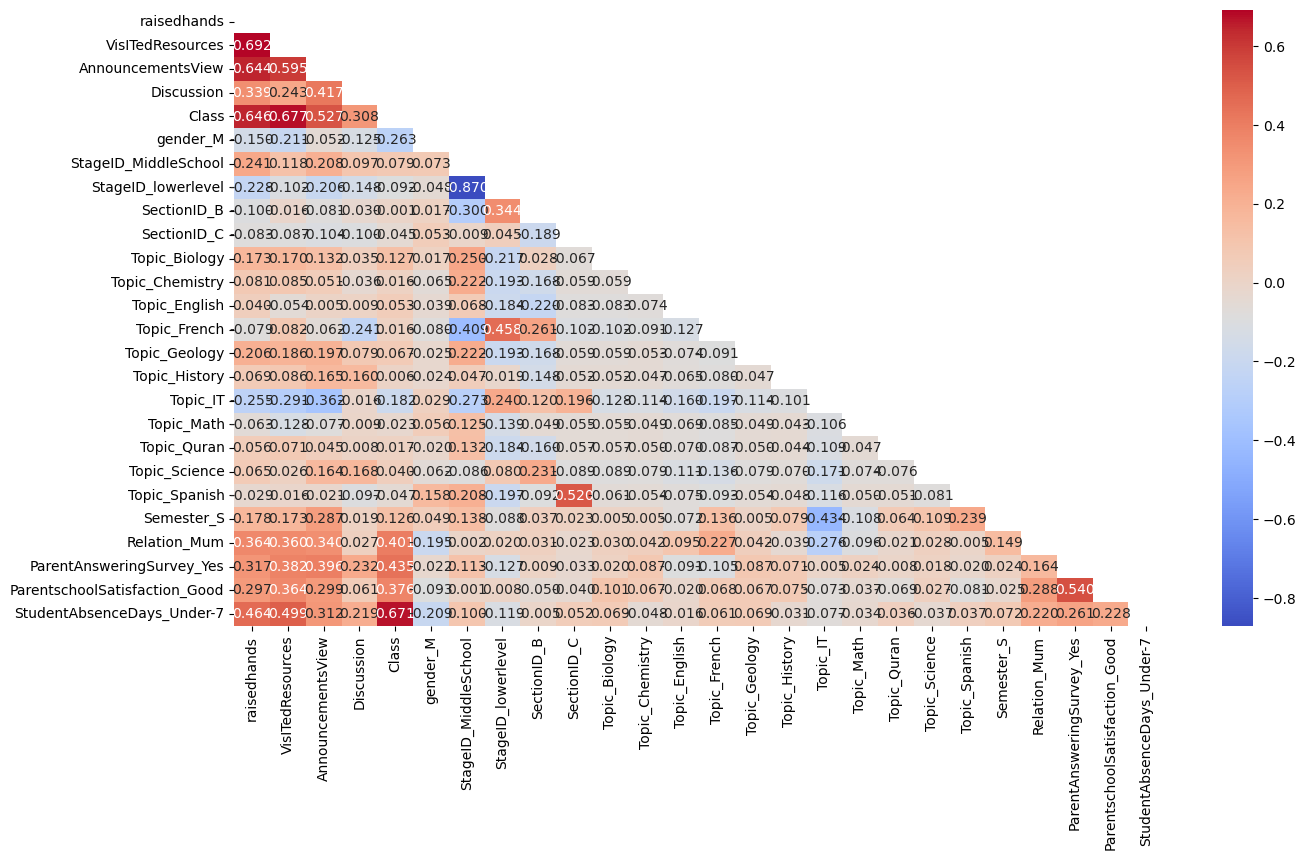

In [224]:
corr = mod_df.corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize = (15,8))
sns.heatmap(corr, cmap = "coolwarm", annot=True, mask = mask,fmt='.3f')

## 스케일링

In [225]:
scaler = StandardScaler()

mod_df['raisedhands'] = preprocessing.scale(mod_df['raisedhands'])
mod_df['VisITedResources'] = preprocessing.scale(mod_df['VisITedResources'])
mod_df['AnnouncementsView'] = preprocessing.scale(mod_df['AnnouncementsView'])
mod_df['Discussion'] = preprocessing.scale(mod_df['Discussion'])

In [226]:
mod_df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']].sample(10)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
254,0.397598,1.277089,0.153526,0.967682
473,1.243205,1.004737,1.545366,0.967682
223,0.820401,0.853431,-0.974994,1.692085
278,1.145635,-0.720155,0.529699,-0.662225
451,-0.903336,1.307350,-0.674055,-1.495289
193,1.113112,0.611341,0.905872,0.351939
384,1.373298,1.125783,0.078291,-0.553565
121,-1.521279,-1.537210,-1.125463,-0.481125
455,-0.252869,1.004737,0.191143,1.040122
205,0.820401,-0.114930,0.153526,-0.698445


In [227]:
mod_df

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,StageID_MiddleSchool,StageID_lowerlevel,SectionID_B,SectionID_C,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,-1.033429,-1.174075,-1.351167,-0.843326,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
1,-0.870813,-1.053029,-1.313549,-0.662225,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
2,-1.196046,-1.446426,-1.426401,-0.481125,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.545579,-0.901723,-1.238315,-0.300024,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.220346,-0.145191,-0.974994,0.243279,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-1.358663,-1.537210,-1.238315,-1.277968,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
476,0.104888,0.671863,-0.899759,-0.553565,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
477,0.267505,0.581080,-0.485969,-0.517345,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
478,-0.545579,-1.143813,-0.899759,0.496820,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   raisedhands                    480 non-null    float64
 1   VisITedResources               480 non-null    float64
 2   AnnouncementsView              480 non-null    float64
 3   Discussion                     480 non-null    float64
 4   Class                          480 non-null    int64  
 5   gender_M                       480 non-null    uint8  
 6   StageID_MiddleSchool           480 non-null    uint8  
 7   StageID_lowerlevel             480 non-null    uint8  
 8   SectionID_B                    480 non-null    uint8  
 9   SectionID_C                    480 non-null    uint8  
 10  Topic_Biology                  480 non-null    uint8  
 11  Topic_Chemistry                480 non-null    uint8  
 12  Topic_English                  480 non-null    uin

<AxesSubplot:>

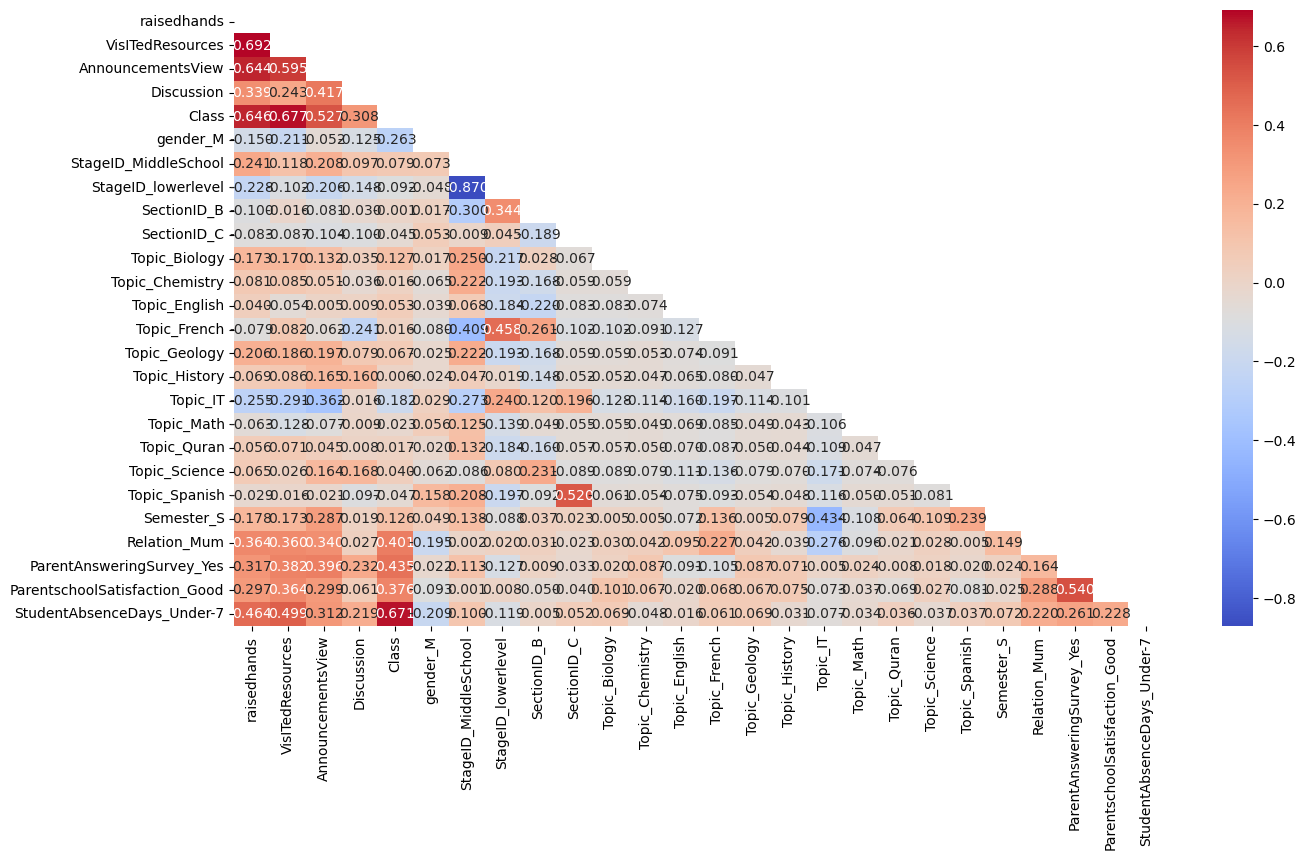

In [229]:
corr = mod_df.corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize = (15,8))
sns.heatmap(corr, cmap = "coolwarm", annot=True, mask = mask,fmt='.3f')

# 모델링

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## train/test  분류

In [231]:
label_name = "Class"
label_name

'Class'

In [232]:
feature_names = mod_df.columns.tolist()
feature_names.remove("Class")
feature_names

['raisedhands',
 'VisITedResources',
 'AnnouncementsView',
 'Discussion',
 'gender_M',
 'StageID_MiddleSchool',
 'StageID_lowerlevel',
 'SectionID_B',
 'SectionID_C',
 'Topic_Biology',
 'Topic_Chemistry',
 'Topic_English',
 'Topic_French',
 'Topic_Geology',
 'Topic_History',
 'Topic_IT',
 'Topic_Math',
 'Topic_Quran',
 'Topic_Science',
 'Topic_Spanish',
 'Semester_S',
 'Relation_Mum',
 'ParentAnsweringSurvey_Yes',
 'ParentschoolSatisfaction_Good',
 'StudentAbsenceDays_Under-7']

In [233]:
train = mod_df[feature_names]
print(train.shape)
display(train.head(2))

(480, 25)


,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,StageID_MiddleSchool,StageID_lowerlevel,SectionID_B,SectionID_C,Topic_Biology,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,-1.033429,-1.174075,-1.351167,-0.843326,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,-0.870813,-1.053029,-1.313549,-0.662225,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1


In [234]:
test = mod_df[label_name]
print(test.shape)
display(test.head(2))

(480,)


0    1
1    1
Name: Class, dtype: int64

## 학습/예측 데이터 셋 만들기

In [235]:
X_train, X_test, y_train, y_test = train_test_split(train, test, 
                                                    test_size=0.2,random_state=42)

In [236]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(384, 25) (96, 25) (384,) (96,)


In [237]:
display(X_train.head(2))
display(y_train.head(2))

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,StageID_MiddleSchool,StageID_lowerlevel,SectionID_B,SectionID_C,Topic_Biology,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
132,-1.521279,-1.567471,-1.050228,-1.459069,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
228,0.852925,0.883692,1.470131,1.366104,1,0,0,1,0,0,...,0,1,0,0,0,1,1,1,1,0


132    0
228    2
Name: Class, dtype: int64

In [238]:
display(X_test.head(2))
display(y_test.head(2))

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,StageID_MiddleSchool,StageID_lowerlevel,SectionID_B,SectionID_C,Topic_Biology,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
73,-0.903336,-0.750417,-0.448351,-0.879546,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
414,-1.196046,-1.385904,-1.351167,-1.531509,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0


73     1
414    0
Name: Class, dtype: int64

In [239]:
# 결측치 확인
print(X_train.isnull().sum().sum(), X_test.isnull().sum().sum(), 
      y_train.isnull().sum().sum(), y_test.isnull().sum().sum())

0 0 0 0


## 로지스틱 회귀

- 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는 데 사용되는 통계 기법이다.

- 로지스틱 회귀의 목적은 일반적인 회귀 분석의 목표와 동일하게 종속 변수와 독립 변수간의 관계를 구체적인 함수로 나타내어 향후 예측 모델에 사용하는 것이다. 
    - 이는 독립 변수의 선형 결합으로 종속 변수를 설명한다는 관점에서는 선형 회귀 분석과 유사하다. 하지만 로지스틱 회귀는 선형 회귀 분석과는 다르게 종속 변수가 범주형 데이터를 대상으로 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류 (classification) 기법으로도 볼 수 있다.

- 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘
- 로지스틱 회귀 분석은 의료, 통신, 데이터마이닝과 같은 다양한 분야에서 분류 및 예측을 위한 모델로서 폭넓게 사용되고 있다.

- 하이퍼파라미터튜닝

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://suy379.tistory.com/159
* https://velog.io/@sset2323/05-07.-%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1-%ED%9A%8C%EA%B7%80
* https://ysyblog.tistory.com/83
* https://m.blog.naver.com/gdpresent/221703566189

In [240]:
model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)
print(model.fit(X_train, y_train))

LogisticRegression(random_state=42)


In [241]:
# #하이퍼파라미터튜닝
# import warnings
# warnings.filterwarnings(action='ignore')
# from sklearn.model_selection import GridSearchCV

# penalty = ['l1','l2']
# c = [0.01, 0.1, 1, 1, 5, 10]
# max_iter = list(range(100, 1100, 100))
# solver = {'lbfgs', 'liblinear'}
# n_jobs = [-1, 1]

# params={'max_iter':max_iter,
#         'C':c,
#        'penalty':penalty,
# #        'multi_class':multi_class,
# #        'solver':solver,
#        'n_jobs':n_jobs}

# clf = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5)
# clf.fit(X_train, y_train)
# print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(clf.best_params_, 
#                                                   clf.best_score_))


In [242]:
model = LogisticRegression(penalty = 'l2', 
                           C=1, 
                           max_iter = 100,
                           n_jobs=-1,
                           solver="lbfgs",
                           multi_class = "auto",
                          random_state=42)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [243]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.8229
Test set score: 0.8542


In [244]:
accuracy = accuracy_score(y_test, y_predict)
print("accuracy: ", accuracy)

accuracy:  0.8541666666666666


In [245]:
report = classification_report(y_test, y_predict, 
                               target_names=['L', 'M', 'H'])
print(report)

              precision    recall  f1-score   support

           L       0.84      1.00      0.91        26
           M       0.89      0.81      0.85        48
           H       0.81      0.77      0.79        22

    accuracy                           0.85        96
   macro avg       0.84      0.86      0.85        96
weighted avg       0.86      0.85      0.85        96



<AxesSubplot:>

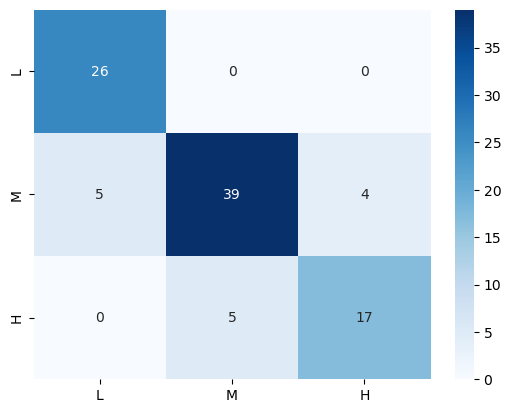

In [246]:
cm =confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap="Blues", 
            xticklabels=['L', 'M', 'H'],
           yticklabels=['L', 'M', 'H'])

## 랜덤포레스트

In [247]:
model = RandomForestClassifier(max_depth=9, max_features=0.9, min_samples_leaf=3,
                       n_jobs=-1, random_state=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [248]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9427
Test set score: 0.8333


In [249]:
accuracy = accuracy_score(y_test, y_predict)
print("accuracy: ", accuracy)

accuracy:  0.8333333333333334


In [250]:
report = classification_report(y_test, y_predict, 
                               target_names=['L', 'M', 'H'])
print(report)

              precision    recall  f1-score   support

           L       0.86      0.92      0.89        26
           M       0.82      0.85      0.84        48
           H       0.83      0.68      0.75        22

    accuracy                           0.83        96
   macro avg       0.84      0.82      0.83        96
weighted avg       0.83      0.83      0.83        96



<AxesSubplot:>

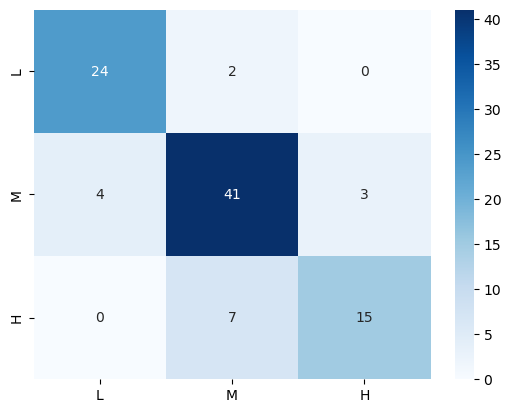

In [251]:
cm =confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap="Blues", 
            xticklabels=['L', 'M', 'H'],
           yticklabels=['L', 'M', 'H'])

## KNN

In [252]:
model = KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=8,
                     weights='distance')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [253]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7500


In [254]:
accuracy = accuracy_score(y_test, y_predict)
print("accuracy: ", accuracy)

accuracy:  0.75


In [255]:
report = classification_report(y_test, y_predict, 
                               target_names=['L', 'M', 'H'])
print(report)

              precision    recall  f1-score   support

           L       0.78      0.96      0.86        26
           M       0.77      0.71      0.74        48
           H       0.65      0.59      0.62        22

    accuracy                           0.75        96
   macro avg       0.73      0.75      0.74        96
weighted avg       0.75      0.75      0.74        96



<AxesSubplot:>

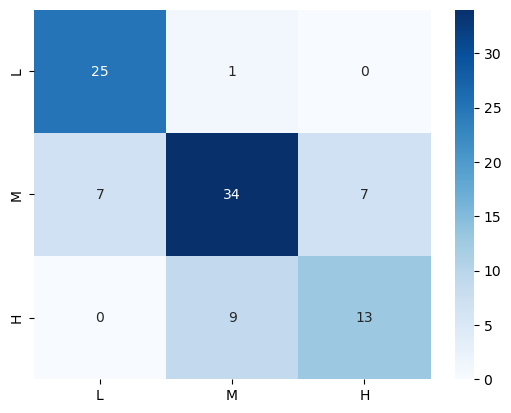

In [256]:
cm =confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap="Blues", 
            xticklabels=['L', 'M', 'H'],
           yticklabels=['L', 'M', 'H'])

## 결정트리

In [257]:
model =  DecisionTreeClassifier(max_depth= 5, 
                                max_features= 0.8, 
                                max_leaf_nodes= None, 
                                min_samples_leaf= 1, 
                                min_samples_split= 2,
                               random_state=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [258]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.8594
Test set score: 0.8333


In [259]:
accuracy = accuracy_score(y_test, y_predict)
print("accuracy: ", accuracy)

accuracy:  0.8333333333333334


In [260]:
report = classification_report(y_test, y_predict, 
                               target_names=['L', 'M', 'H'])
print(report)

              precision    recall  f1-score   support

           L       0.88      0.85      0.86        26
           M       0.83      0.83      0.83        48
           H       0.78      0.82      0.80        22

    accuracy                           0.83        96
   macro avg       0.83      0.83      0.83        96
weighted avg       0.83      0.83      0.83        96



<AxesSubplot:>

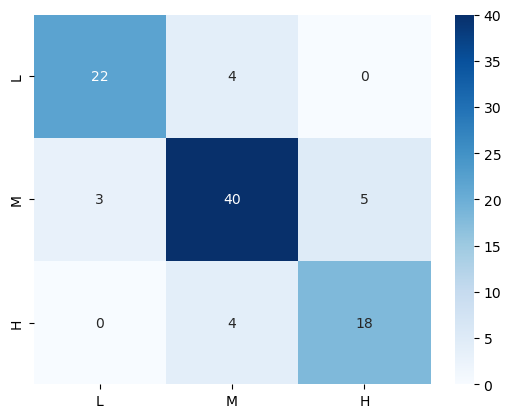

In [261]:
cm =confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap="Blues", 
            xticklabels=['L', 'M', 'H'],
           yticklabels=['L', 'M', 'H'])

## xgboost

In [262]:
model = XGBClassifier(max_depth=10, n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

[01:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [263]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8125


In [264]:
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("accuracy: ", accuracy)

accuracy:  0.8125


In [265]:
report = classification_report(y_test, y_predict, 
                               target_names=['L', 'M', 'H'])
print(report)

              precision    recall  f1-score   support

           L       0.83      0.92      0.87        26
           M       0.84      0.77      0.80        48
           H       0.74      0.77      0.76        22

    accuracy                           0.81        96
   macro avg       0.80      0.82      0.81        96
weighted avg       0.81      0.81      0.81        96



<AxesSubplot:>

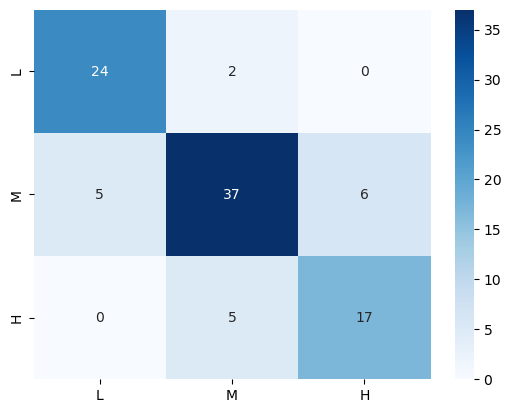

In [266]:
cm =confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, cmap="Blues", 
            xticklabels=['L', 'M', 'H'],
           yticklabels=['L', 'M', 'H'])

# Ensemble with GridSearchCV

앙상블 모델 학습
위 코드에서는 3개의 모델을 선택하여 GridSearchCV 를 통해 각 모델들의 파라미터들을 최적화해주었습니다.

그 다음에는 3개의 모델을 모두 활용하여 하나의 모델을 설계해 보겠습니다.

앙살블 기법은 "집단지성" 으로 부터 아이디어를 얻은 알고리즘입니다.

모델 하나의 예측 보다는 여러 모델들의 예측을 종합하여 도출한 예측이 더 정확할 때가 많습니다.

Regression 의 경우 각 모델들이 개별로 예측한 값의 평균 값을 도출하는 방식으로 여러 모델들을 조합해줍니다.

sklearn 패키지의 VotingRegressor 메소드를 통해 앙상블 모델을 구현할 수 있습니다.

GridSearchCV 를 통해 최적의 파라미터들을 찾은 모델들 VotingRegressor 객체에 할당한 후, 학습을 진행합니다.

https://dacon.io/competitions/official/235869/codeshare/4404?page=1&dtype=recent

In [267]:
#GridSearchCV 를 사용할 모델들을 호출합니다.
from sklearn.model_selection import GridSearchCV

#모델들을 할당할 리스트를 만들어줍니다.
estimators = []

#estimators 리스트에 모델들을 추가해줍니다.
logreg = LogisticRegression(random_state=42)
estimators.append(logreg)

rf = RandomForestClassifier(random_state=42)
estimators.append(rf)

knn =  KNeighborsClassifier()
estimators.append(knn)

dct = DecisionTreeClassifier(random_state=42)
estimators.append(dct)

xgb = XGBClassifier(random_state=42)
estimators.append(xgb)

#모들의 파라미터들을 할당할 리스트를 만들어줍니다.
params = []

# params 리스트에 성능을 비교하고자하는 파라미터들 추가해줍니다.
penalty = ['l1','l2']
c = [0.01, 0.1, 1, 1, 5, 10]
max_iter = list(range(100, 1100, 100))
n_jobs = [-1, 1]

params_logreg = {'max_iter':max_iter,
        'C':c,
       'penalty':penalty,
       'n_jobs':n_jobs}

params.append(params_logreg)

params_rf = {'n_estimators' : [200], 
             'max_depth':[5,10,15,20], 
             'max_samples' : [0.2, 0.4, 0.7, 0.8, 0.9, 1.0], 
             'max_features':[0.2, 0.4, 0.7, 0.8, 0.9, 1.0]}

params.append(params_rf)

params_knn =  {
                'n_neighbors' : list(range(1,20)),
                'weights' : ["uniform", "distance"],
                'metric' : ['euclidean', 'manhattan', 'minkowski']
}
params.append(params_knn)

params_dct = {
    'criterion':['gini','entropy'], 
    'max_depth':[None,2,3,4,5,6], 
    'max_leaf_nodes':[None,2,3,4,5,6,7], 
    'min_samples_split':[2,3,4,5,6], 
    'min_samples_leaf':[1,2,3], 
    'max_features':[None,'sqrt','log2',3,4,5]
    }
params.append(params_dct)

params_xgb = {
    'n_estimators' : [100,200],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.5,0.8]
    
}
params.append(params_xgb)

In [268]:
from tqdm.auto import tqdm
def gridSearchCV(models,params):
    best_models=[]
    for i in tqdm(range(0,len(models))):
        model_grid = GridSearchCV(models[i], params[i],n_jobs = -1, verbose=2, cv=5)
        model_grid.fit(X_train,y_train)
        best_models.append(model_grid.best_estimator_)
    return best_models

best_model_list = gridSearchCV(estimators,params)

  0%|          | 0/5 [00:00<?, ?it/s]

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 114 candidates, totalling 570 fits
Fitting 5 folds for each of 7560 candidates, totalling 37800 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[01:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [269]:
best_model_list

[LogisticRegression(C=1, n_jobs=-1, random_state=42),
 RandomForestClassifier(max_depth=20, max_features=0.2, max_samples=0.8,
                        n_estimators=200, random_state=42),
 KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance'),
 DecisionTreeClassifier(max_depth=6, min_samples_split=3, random_state=42),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=15,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1,
               objective='multi:softprob', random_state=42, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=None, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)]

In [1]:
#GridSearchCV 를 통해 최적화된 모델들을 사용합니다.
#앙상블 기법을 위한 패키지를 불러옵니다.
best_models = [
             ('LogisticReg',LogisticRegression(C=1, n_jobs=-1, random_state=42)),
             ('rf', RandomForestClassifier(max_depth=20, max_features=0.2, max_samples=0.8,
                        n_estimators=200, random_state=42)),
             ('knn',KNeighborsClassifier(metric='manhattan', n_neighbors=19, weights='distance')),
             ('dst',DecisionTreeClassifier(max_depth=6, min_samples_split=3, random_state=42)),
             ('xgb',XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=15,
               min_child_weight=1, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1,
               objective='multi:softprob', random_state=42, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=None, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None))]


from sklearn.ensemble import VotingClassifier

#앙상블 모델을 학습시켜줍니다.
voting_clf =VotingClassifier(estimators=best_models,voting='soft')
voting_clf.fit(X_train,y_train)

NameError: name 'LogisticRegression' is not defined

In [271]:
classifiers = best_model_list
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

voting_clf.fit(X_train, y_train)
pred = voting_clf.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.8542
RandomForestClassifier 정확도: 0.8542
KNeighborsClassifier 정확도: 0.7188
DecisionTreeClassifier 정확도: 0.7917
[01:39:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 정확도: 0.8333
[01:39:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
보팅 분류기의 정확도:  0.8333


In [272]:
y_predict = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("accuracy: ", accuracy)

accuracy:  0.8333333333333334
